El objetivo del estudio es analizar la relación entre el uso diario de redes sociales y el rendimiento académico de los estudiantes. 

El objetivo será ver una correlación entre las dos variables

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn  as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Cargar los archivos

df= pd.read_csv('Students Social Media Addiction.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [12]:
avg_use= df['Avg_Daily_Usage_Hours'].mean(axis=0)

print(f"Promedio de uso diario: {avg_use:.2f} horas")

Promedio de uso diario: 4.92 horas


In [24]:
df[df['Affects_Academic_Performance']== 'Yes'].shape[0]

df['Affects_Academic_Performance'].str.contains('yes', case=False).sum()

np.int64(453)

In [34]:
#correlación

corr_var = df['Addicted_Score'].corr(df['Mental_Health_Score'], method= 'spearman')

if corr_var < 0:
    print(f'correlación inversamente proporcional de {corr_var:.2f}')
else:
    print(f'correlación proporcional de {corr_var:.2f}')

correlación inversamente proporcional de -0.95


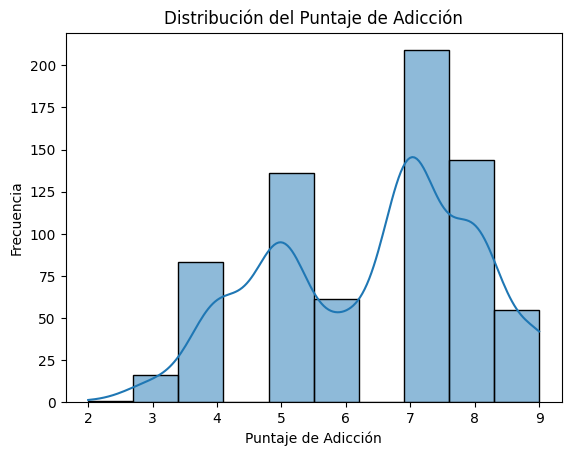

In [42]:
sns.histplot(df['Addicted_Score'], bins=10, kde=True)
plt.title('Distribución del Puntaje de Adicción')
plt.xlabel('Puntaje de Adicción')
plt.ylabel('Frecuencia')
plt.show()

In [5]:
# Crear una columna según el scroing

def select_socring(p_1):
    if p_1 >= 7:
        resultado = 'Alto'
    elif (p_1 >= 4 and p_1 < 7): 
        resultado = 'Medio'
    else:
        resultado = 'Bajo'
    return resultado


df['Nivel_Adiccion'] = df['Addicted_Score'].apply(select_socring)

print(df.head(2))

   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Social_Media  \
0                    6     In Relationship                            3   
1                    8              Single                            0   

   Addicted_Score Nivel_Adiccion  
0               8           Alto  
1               3           Bajo  


In [7]:
# promedio de salud mental por nivel de adicción
niveles =  ['Bajo', 'Medio', 'Alto']

df['Nivel_Adiccion'] = pd.Categorical(df['Nivel_Adiccion'], categories= niveles, ordered=True)

df.pivot_table('Mental_Health_Score',index= 'Nivel_Adiccion', aggfunc= 'mean').sort_index(ascending= False)


C:\Users\Esteban\AppData\Local\Temp\ipykernel_9960\3562073218.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table('Mental_Health_Score',index= 'Nivel_Adiccion', aggfunc= 'mean').sort_index(ascending= False)


,Mental_Health_Score
Nivel_Adiccion,
Alto,5.433824
Medio,7.271429
Bajo,8.058824


In [6]:
# otra forma para hacerlo

df.groupby('Nivel_Adiccion')['Mental_Health_Score'].mean()

Nivel_Adiccion
Alto     5.433824
Bajo     8.058824
Medio    7.271429
Name: Mental_Health_Score, dtype: float64

In [ ]:
df['NormScore'] = df.groupby('Age')['Addicted_Score'].transform(lambda x: (x - x.mean()) / x.std())

df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Nivel_Adiccion,NormScore
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,Alto,0.721398
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,Bajo,-2.095088
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,Alto,1.748003
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,Medio,-2.563234
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,Alto,0.329874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5,Medio,-1.025271
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9,Alto,1.761758
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7,Alto,0.329874
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4,Medio,-1.149572


Árbol de decisión

In [14]:
df['Riesgo'] = df['Mental_Health_Score'].apply(lambda x: 1 if x < 3 else 0)

df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Nivel_Adiccion,NormScore,Riesgo
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,Alto,0.721398,0
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,Bajo,-2.095088,0
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,Alto,1.748003,0
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,Medio,-2.563234,0
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,Alto,0.329874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5,Medio,-1.025271,0
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9,Alto,1.761758,0
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7,Alto,0.329874,0
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4,Medio,-1.149572,0


In [15]:
predictoras = ['Addicted_Score', 'Avg_Daily_Usage_Hours', 'Age','Affects_Academic_Performance']
X = df[predictoras]
y = df['Riesgo']

In [16]:
X = pd.get_dummies(df[predictoras + ['Gender']], drop_first=True)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Accuracy: 1.00


c:\Users\Esteban\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


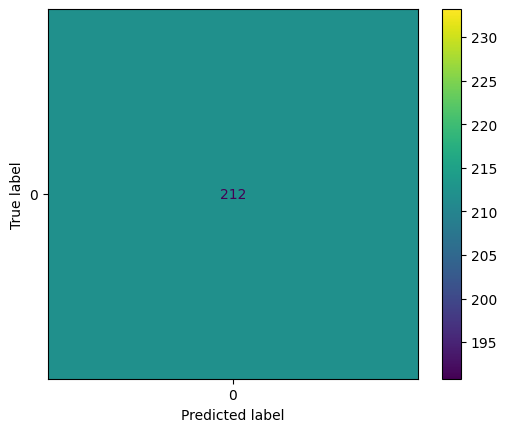

In [19]:
y_pred = modelo.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


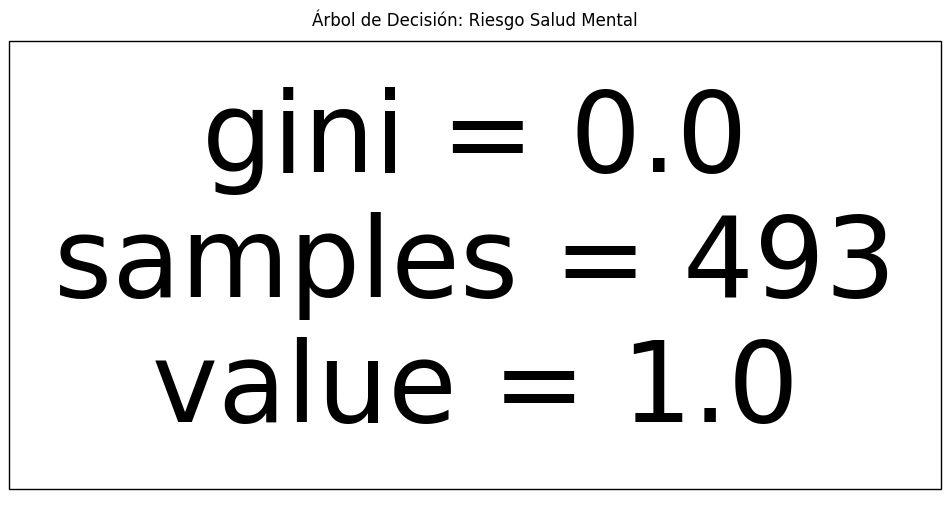

In [20]:
plt.figure(figsize=(12, 6))
plot_tree(modelo, feature_names=X.columns, class_names=['Sin Riesgo', 'Riesgo'], filled=True)
plt.title("Árbol de Decisión: Riesgo Salud Mental")
plt.show()
